In [1]:
import lightning as L 
import matplotlib.pyplot as plt
import lightning as L
from lightning.pytorch.tuner import Tuner
from lightning.pytorch.callbacks import ModelCheckpoint, LearningRateMonitor, EarlyStopping, StochasticWeightAveraging
import torch 

torch.set_float32_matmul_precision("high")

In [2]:
from src.models.SimpleFC import SimpleFC_Lit
from src.models.FCSplit import FC_Split

In [3]:
import numpy as np

In [9]:
model = SimpleFC_Lit.load_from_checkpoint("lightning_logs/FullCN_nPrune_02_nLayers/version_13/checkpoints/last.ckpt")

In [10]:
model.setup()

In [11]:
device = "cpu"
model.to(device)
model.eval()


SimpleFC_Lit(
  (dropout_in): Identity()
  (dropout): Identity()
  (loss): MSELoss()
  (activation): ReLU()
  (linear_layers): ModuleList(
    (0): Sequential(
      (0): Identity()
      (1): Linear(in_features=201, out_features=200, bias=True)
      (2): Identity()
      (3): ReLU()
      (4): Identity()
      (5): Linear(in_features=200, out_features=200, bias=True)
      (6): Identity()
      (7): ReLU()
      (8): Identity()
      (9): Linear(in_features=200, out_features=200, bias=True)
      (10): Identity()
      (11): ReLU()
      (12): Identity()
      (13): Linear(in_features=200, out_features=200, bias=True)
      (14): Identity()
      (15): ReLU()
      (16): Identity()
      (17): Linear(in_features=200, out_features=200, bias=True)
      (18): Identity()
      (19): ReLU()
      (20): Identity()
      (21): Linear(in_features=200, out_features=200, bias=True)
      (22): Identity()
      (23): ReLU()
      (24): Identity()
      (25): Linear(in_features=200, out_feature

In [12]:
x_test, y_test = model.test_dataset[-500]
x_test = x_test.to(device).reshape(1,-1)
y_pred = model(x_test).detach().numpy()
y_pred[0,100:].shape

(100,)

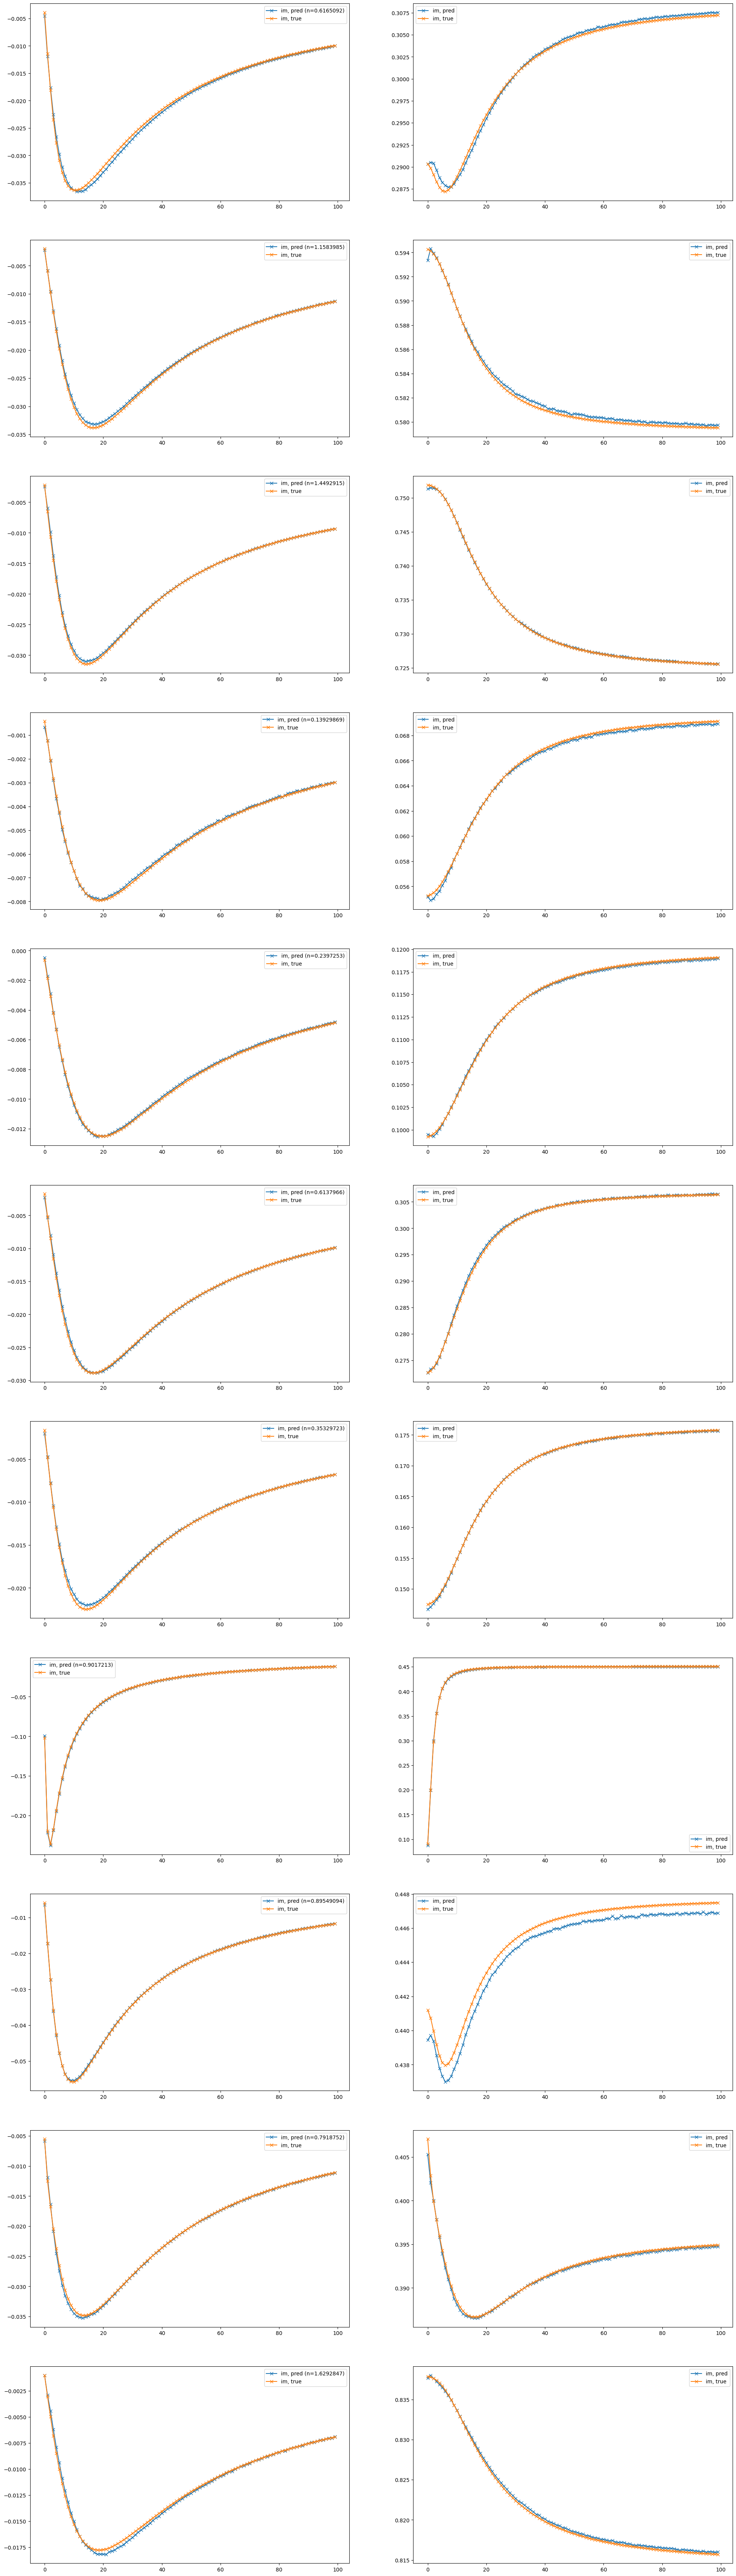

In [13]:
ind_list = [-1, -2, -3, -1501,-1506,-1510,-1511,-1514,-1515, -1517, -1521]

fig,ax = plt.subplots(len(ind_list),2, figsize=(24,8*len(ind_list)))
for i,ind in enumerate(ind_list):
    x_test, y_test = model.test_dataset[ind]
    x_test = x_test.to(device).reshape(1,-1)
    y_pred = model(x_test).detach().numpy()


    ax[i,0].plot(y_pred[0,100:], marker="x", label="im, pred (n="+str(x_test.detach().numpy()[0,0])+")")
    ax[i,0].plot(y_test[100:], marker="x", label="im, true")
    ax[i,0].legend()

    ax[i,1].plot(y_pred[0,0:100], marker="x", label="im, pred")
    ax[i,1].plot(y_test[0:100], marker="x", label="im, true")
    ax[i,1].legend()
plt.savefig("demo.pdf")